In [60]:
import json
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
import tensorflow as tf
import tensorflow_hub as hub
import umap

In [67]:
use = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [32]:
sonnets_file_name = './../data/sonnets.json'
with open(sonnets_file_name, 'r') as in_file:
    raw_sonnets = json.load(in_file)
    sonnets = ['\n'.join(s) for s in raw_sonnets]

In [112]:
labels = []
named_labels = []
for i in range(len(sonnets)):
    if i >= 78 and i <= 86:
        labels.append(0)
        named_labels.append('Rival Poet')
    elif i <= 126:
        labels.append(1)
        named_labels.append('Fair Youth')
    else:
        labels.append(2)
        named_labels.append('Dark Lady')

In [105]:
umap_reducer = umap.UMAP(random_state=42)

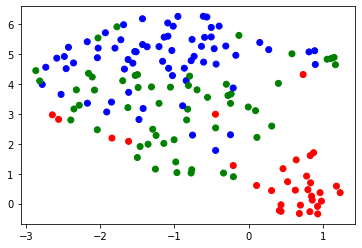

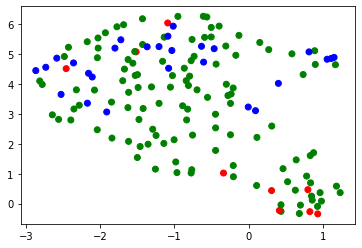

In [123]:
tfidf_vectors = TfidfVectorizer().fit_transform(sonnets).toarray()
tfidf_embedding = umap_reducer.fit_transform(tfidf_vectors)
tfidf_clusters = KMeans(n_clusters=3, random_state=2).fit(tfidf_vectors)
cs = ['red', 'green', 'blue']
plt.scatter([v[0] for v in tfidf_embedding], [v[1] for v in tfidf_embedding], c=[cs[l] for l in tfidf_clusters.labels_])
plt.show()
plt.scatter([v[0] for v in tfidf_embedding], [v[1] for v in tfidf_embedding], c=[cs[l] for l in labels])
plt.show()

In [124]:
def get_shifted_axis(axis):
    axis_min = min(axis)
    axis_max = max(axis)
    return[(a - axis_min) / (axis_max - axis_min) * 255 for a in axis]

def get_colors(embedding):
    rs = get_shifted_axis([v[0] for v in embedding])
    gs = get_shifted_axis([v[1] for v in embedding])
    bs = get_shifted_axis([v[2] for v in embedding])
    return [(round(rs[i]), round(gs[i]), round(bs[i])) for i in range(len(embedding))]

In [128]:
color_tfidf_embedding = umap.UMAP(n_components=3, random_state=42).fit_transform(tfidf_vectors)
tfidf_colors = get_colors(color_tfidf_embedding)

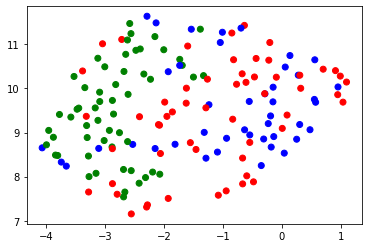

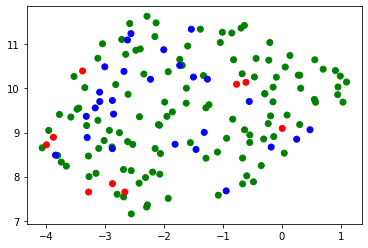

In [126]:
use_vectors = use(sonnets)
use_embedding = umap.UMAP(random_state=42).fit_transform(use_vectors)
use_clusters = KMeans(n_clusters=3, random_state=2).fit(use_vectors)
cs = ['red', 'green', 'blue']
plt.scatter([v[0] for v in use_embedding], [v[1] for v in use_embedding], c=[cs[l] for l in use_clusters.labels_])
plt.show()
plt.scatter([v[0] for v in use_embedding], [v[1] for v in use_embedding], c=[cs[l] for l in labels])
plt.show()

In [129]:
color_use_embedding = umap.UMAP(n_components=3, random_state=42).fit_transform(use_vectors)
use_colors = get_colors(color_use_embedding)

In [135]:
out_sonnets = []
for i in range(len(sonnets)):
    out_sonnets.append({
        'as_array': raw_sonnets[i],
        'as_text': sonnets[i],
        'named_label': named_labels[i],
        'tfidf_label': int(tfidf_clusters.labels_[i]),
        'tfidf_color': [int(c) for c in tfidf_colors[i]],
        'use_label': int(use_clusters.labels_[i]),
        'use_color': [int(c) for c in use_colors[i]]
    })

In [137]:
with open('./../data/data.json', 'w') as out_file:
    json.dump(out_sonnets, out_file)
with open('./../public/data.json', 'w') as out_file:
    json.dump(out_sonnets, out_file)